In [1]:
# Import required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

+ ```python lebwohl_lasher.py 500 50 0.5 1```

$\textbf{1. Ensure Correct Plots Are Produced}$

+ ```lebwohl_lasher.py Version: Commit - f24272d3b723955fc846da8a6c7a7c0df1c04d4f```

In [2]:
# Read in the output data.
data = pd.DataFrame(np.loadtxt("output_logs/output_normal_f24272d3b723955fc846da8a6c7a7c0df1c04d4f.txt", 
                               dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2557.4  |  0.2631 |
|     1 |  0.6644 | -3782.31 |  0.2788 |
|     2 |  0.628  | -4491.71 |  0.2846 |
|     3 |  0.5796 | -5101.4  |  0.2895 |
|     4 |  0.5648 | -5536.65 |  0.2952 |


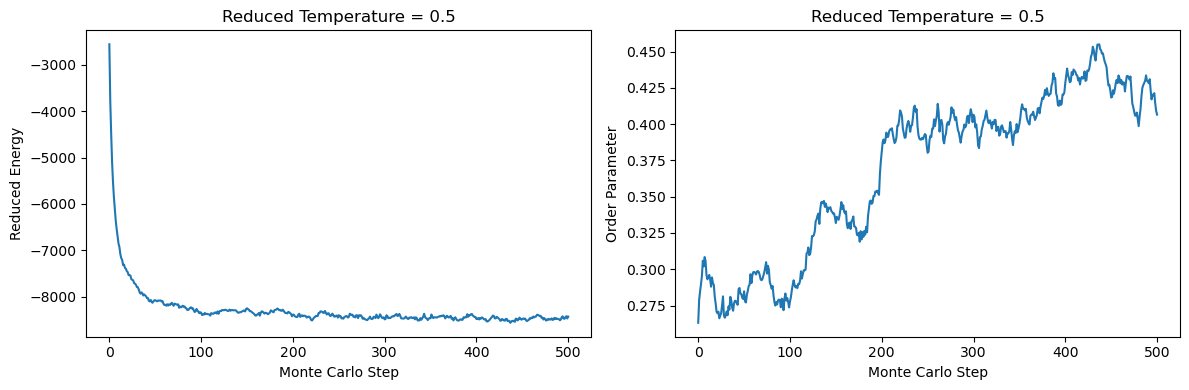

In [3]:
## Plot energy and order parameter against Monte Carlo step.

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(data.index, data["Energy"])
ax[1].plot(data.index, data["Order"])

ax[0].set_title("Reduced Temperature = 0.5")
ax[0].set_xlabel("Monte Carlo Step")
ax[0].set_ylabel("Reduced Energy")

ax[1].set_title("Reduced Temperature = 0.5")
ax[1].set_xlabel("Monte Carlo Step")
ax[1].set_ylabel("Order Parameter")

fig.tight_layout()
plt.show()

$\textbf{2. Check Output Values Are Consistent}$

+ $\text{Test if the output logs across versions of the code are the same.}$
+ $\text{This is done through performing a simulation where the random seed is to 42.}$

- ```-> np.random.seed(42)```